# TRABAJO SEMANAL 6

> ## Alumno: Fabrizio Hermosa
> ## Materia: Teoría de los circuitos II
> ## Curso: R4001

## <u> Consignas y desarrollo </u>  ##

In [1]:
from IPython.display import IFrame
IFrame("./TS6_R4001_FabrizioHermosa.pdf", width=900, height=1000)

## <u> Simulaciones en LTspice </u> ##


Para el **ejercicio 1** se simuló el circuito con el fin de obtener las curvas de los parámetros Z.

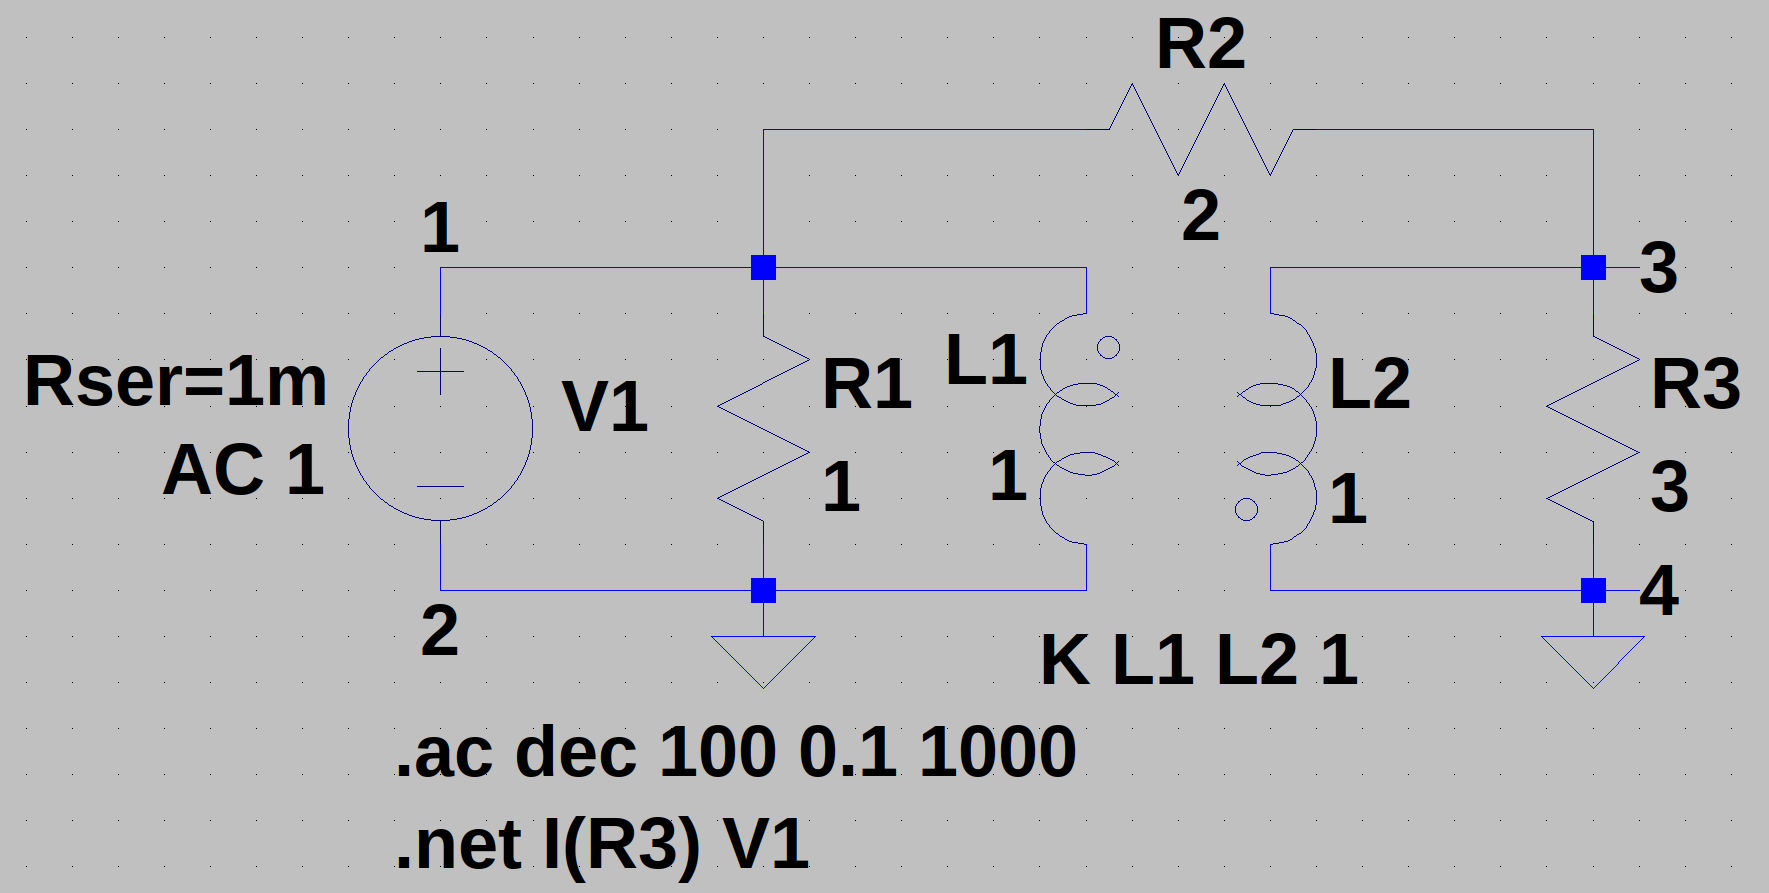

Se obtuvo lo siguiente:

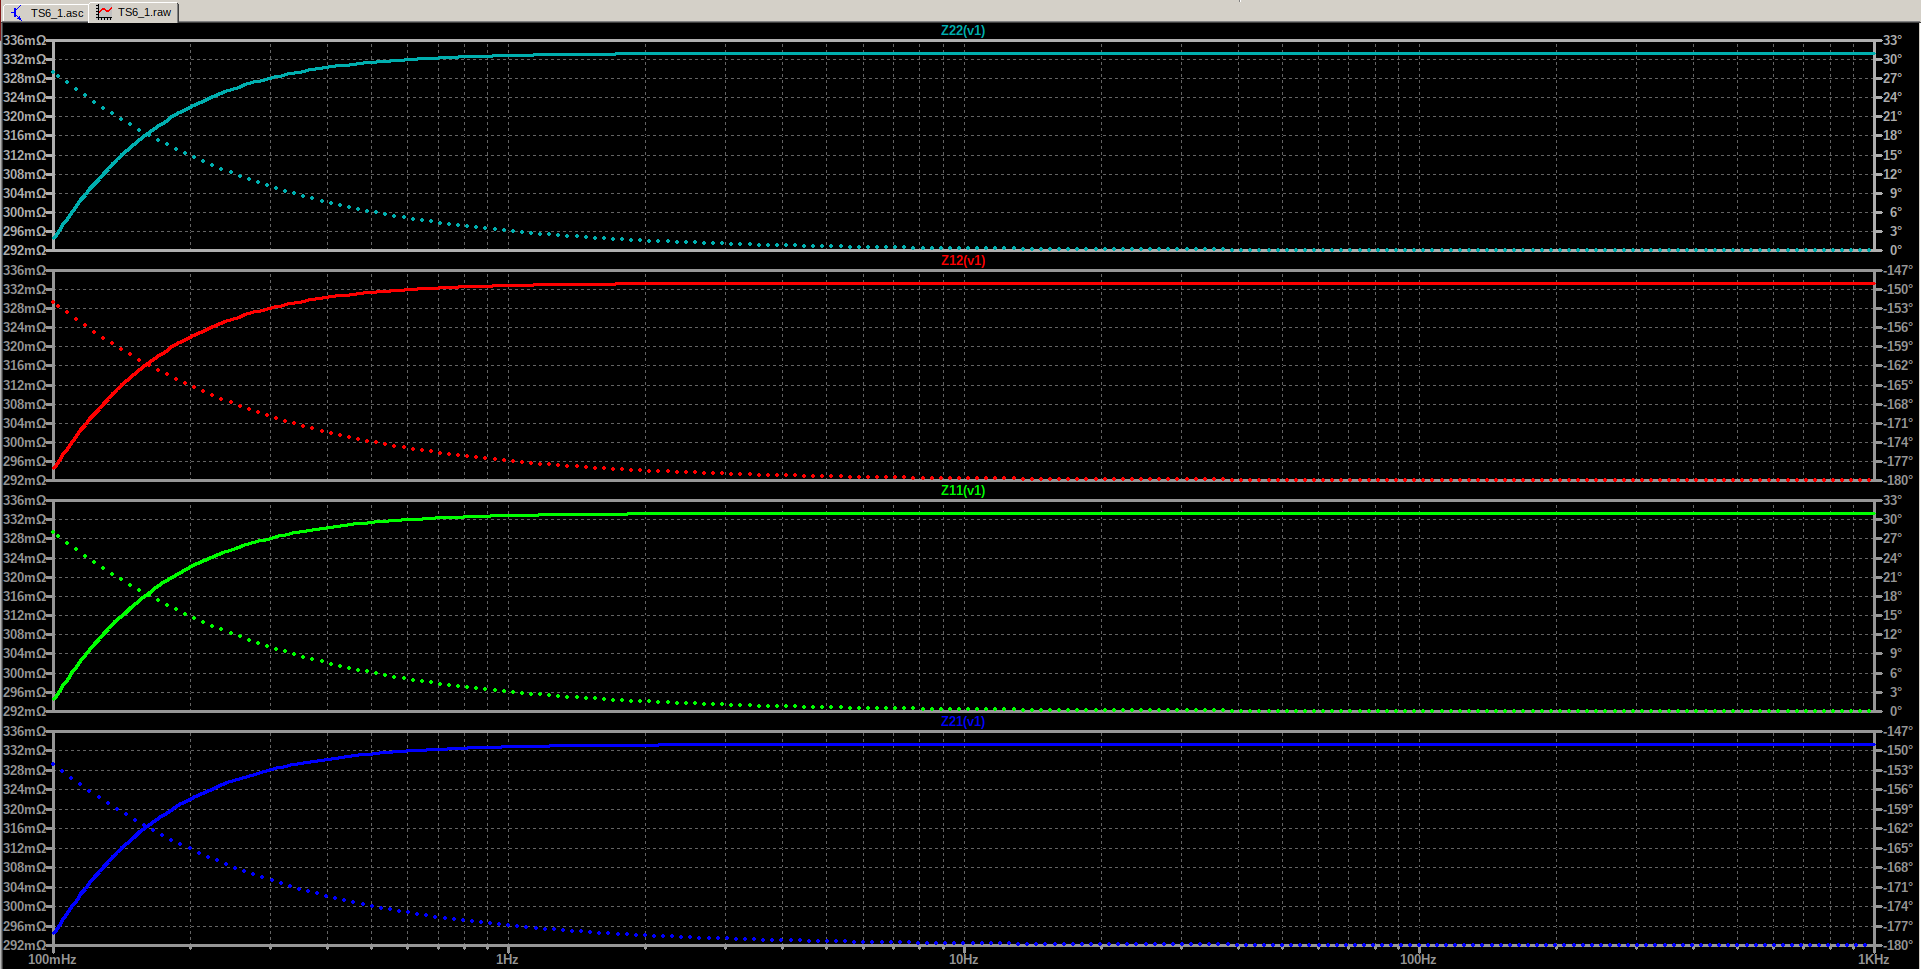

Analíticamente todos los parámetros Z eran iguales a 0.3, sin embargo en la simulación difieren muy poco. Siendo exactos, en la simulación da 0.333


Para el **ejercicio 2** se simuló el siguiente circuito para corroborar la transferencia analítica, que era de un Butterworth.

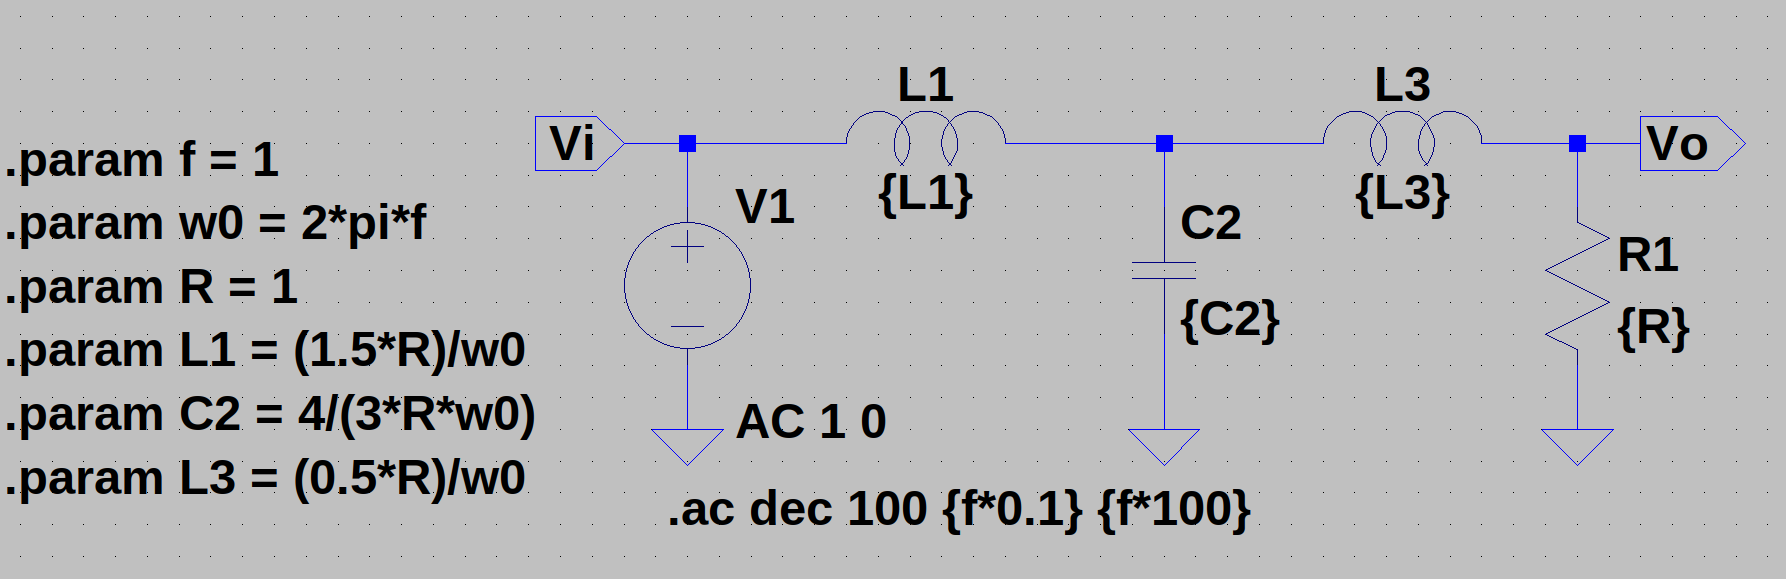

Se obtuvo:

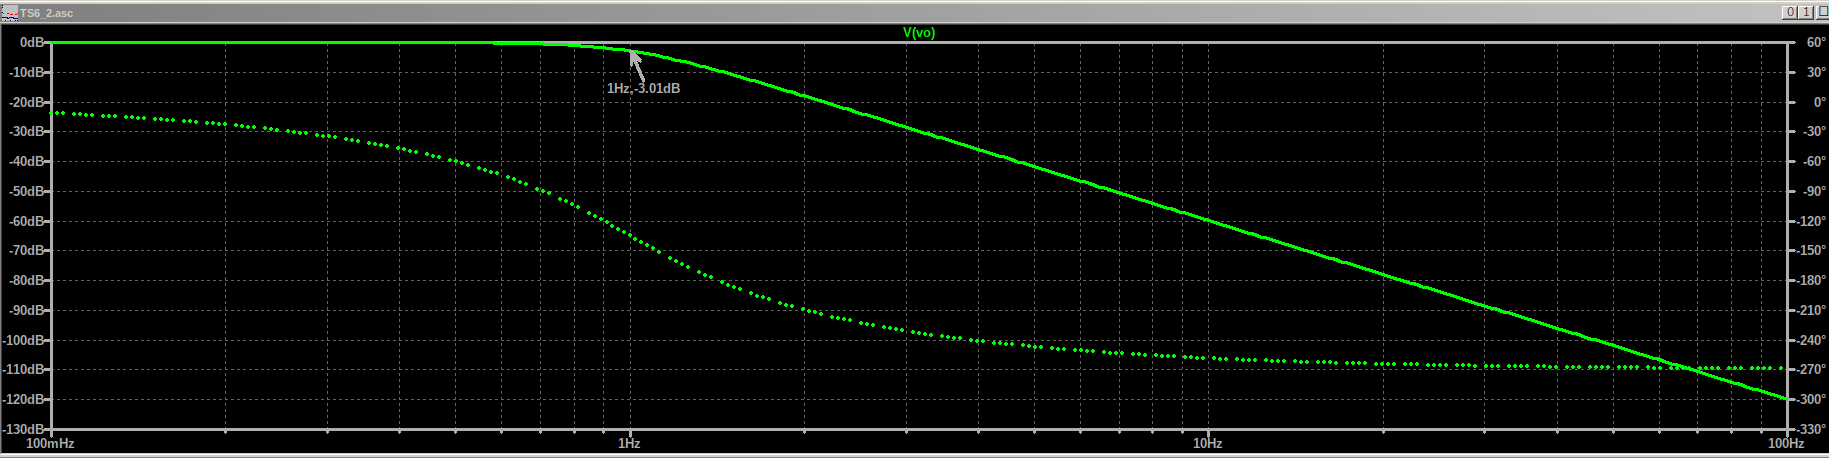

Con lo cual se puede verificar lo dicho anteriormente.

## <u> Verificaciones en python </u> ##

Para el ejercicio 2 se verificaron tanto la transferencia mediante MAI como la impedancia de entrada.

In [2]:
#Importo librerias de la catedra
import sympy as sp
import pytc2.cuadripolos as tc2
from pytc2.general import print_latex

In [6]:
#Verificacion ej 2

s = sp.symbols('s', complex = True)
Z1, Z3 = sp.symbols('L1 L3', complex = True)
Y1 = 1/(s*Z1)
Y2 = s*sp.symbols('C2', complex = True)
Y3 = 1/(s*Z3)
R = sp.symbols('R', real = True, positive = True)
G = 1/R

#MAI 

MAI = sp.Matrix([
                    [Y1, -Y1, 0, 0],
                    [-Y1, Y1+Y2+Y3, -Y2, -Y3],
                    [0, -Y2, Y2 + G, -G],
                    [0, -Y3, -G, Y3 + G]
                ])

con_detalles = True

#Verifico transferencia
print('Cálculo de la transferencia')

tf = tc2.calc_MAI_vtransf_ij_mn(MAI, 2, 3, 0, 2, verbose = con_detalles)

print_latex('T(s) = ' + sp.latex(tf))


Cálculo de la transferencia


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
#Reemplazo valores para obtenerla normalizada
tf_n = sp.simplify(tf.subs(Z1, 3/2))
tf_n = sp.simplify(tf_n.subs(Y2, s*(4/3)))
tf_n = sp.simplify(tf_n.subs(Z3, 1/2))
tf_n = sp.simplify(tf_n.subs(R, 1))

print_latex('T(s) = ' + sp.latex(tf_n))

<IPython.core.display.Math object>

In [5]:
#Verifico impedancia de entrada
con_detalles = False
Ze = tc2.calc_MAI_impedance_ij(MAI, 0, 2, verbose = con_detalles)
print('Cálculo de la impedancia de entrada')
print_latex('Ze(s) = ' + sp.latex(Ze))

Cálculo de la impedancia de entrada


<IPython.core.display.Math object>